In [43]:
import psycopg2
import osgeo.ogr
import shapely
import shapely.wkt
import geopandas as gpd
%matplotlib inline

In [44]:
DB_HOST = "10.220.5.189"
DB_PORT = 5432
DB_USER = "www-data"
DB_PASSWORD = "www-data"
DB_DATABASE = "are_dev"
connection = psycopg2.connect(database=DB_DATABASE, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT)
cursor = connection.cursor()

In [45]:
cursor.execute("SELECT ST_AsText(the_geom), to_tonnen FROM oeffentlicher_verkehr.belastung_gueterverkehr_bahn WHERE row_id=%s;", (1,))
# connection.commit()
entry = cursor.fetchone()[0]
shape = shapely.wkt.loads(entry)
print(shape.length)

2171.225843447804


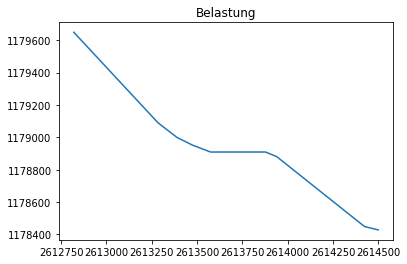

In [56]:

import matplotlib.pyplot as plt
import numpy as np
_x, _y = shape.xy
x = np.array(_x)
y = np.array(_y)
plt.plot(x, y)
plt.title('Belastung')
plt.show()

aspect_ratio: 0.7274453129266093, size_x: 600, size_y: 436.4671877559656


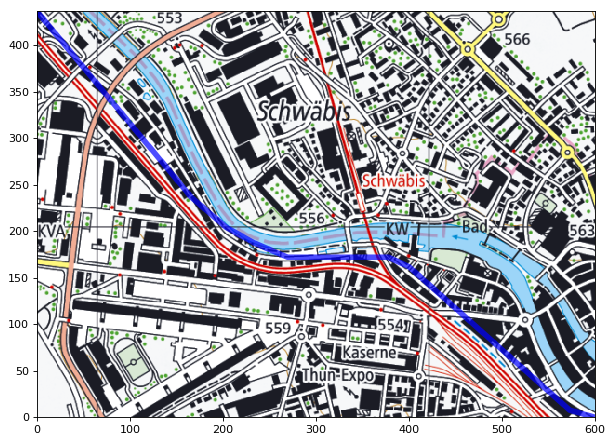

In [82]:
from owslib.wms import WebMapService
wms = WebMapService('http://wms.swisstopo.admin.ch/', version='1.3.0', username="user_brl6a", password="58wbytpjt1a2gz4m")
layer = 'ch.swisstopo.pixelkarte-farbe'
attrs = ['title', 'boundingBox', 'boundingBoxWGS84', 'styles']

# usually always 'default'
# style = next(iter(wms[layer].styles))
# print(min(x), max(x), min(y), max(y))
# print(max(x)-min(x), max(y)-min(y))
width = 600
aspect_ratio = (max(y)-min(y))/(max(x)-min(x))
size_x = width
size_y = width*aspect_ratio
print("aspect_ratio: {}, size_x: {}, size_y: {}".format(aspect_ratio, size_x, size_y))
img = wms.getmap(layers=[layer],
                 styles=['default'],
                 srs='EPSG:2056',
                 bbox=(min(x), min(y), max(x), max(y)),
                 size=(size_x,size_y),
                 format='image/png',
                 transparent=True
)

# from IPython.core.display import Image, display
# display(Image(data=img_data, format='png', unconfined=True))

# Write image content to buffer
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

f_img = io.BytesIO(img.read())

# read image from buffer
img = mpimg.imread(f_img, format='png')

# create plot axis
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax.imshow(img, extent=[0, size_x, 0, size_y])

ax.plot((x-min(x))/(max(x)-min(x))*width, (y-min(y))/(max(y)-min(y))*width*aspect_ratio, linewidth=5, color='blue', alpha=0.7)
plt.show()

